In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir(r"C:\Users\kfais\Downloads\UBER DATA")

In [3]:
files = []
for i in os.listdir():
    files.append(i)

In [4]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [5]:
start = time.time()
df_final = pd.DataFrame()
for i in files:
    df = pd.read_parquet(i, engine="pyarrow")
    df_final = pd.concat([df_final,df], axis=0, ignore_index=False)
print(time.time()-start)

556.7666072845459


In [6]:
df_final.isnull().sum()

VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count           1695172
trip_distance                   0
RatecodeID                1695172
store_and_fwd_flag        1695172
PULocationID                    0
DOLocationID                    0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge      1695172
airport_fee              11046017
Airport_fee              42977990
dtype: int64

# Boostrap(Random Sampling)

In [7]:
df_new = df_final.sample(frac=0.01)

In [8]:
df_new["pick_hour"] = df_new["tpep_pickup_datetime"].dt.hour
df_new["pick_day"] = df_new["tpep_pickup_datetime"].dt.day
df_new["pick_month"] = df_new["tpep_pickup_datetime"].dt.month
df_new["pick_year"] = df_new["tpep_pickup_datetime"].dt.year
df_new["pick_weekday"] = df_new["tpep_pickup_datetime"].dt.weekday

df_new["drop_hour"] = df_new["tpep_dropoff_datetime"].dt.hour
df_new["drop_day"] = df_new["tpep_dropoff_datetime"].dt.day
df_new["drop_month"] = df_new["tpep_dropoff_datetime"].dt.month
df_new["drop_year"] = df_new["tpep_dropoff_datetime"].dt.year
df_new["drop_weekday"] = df_new["tpep_dropoff_datetime"].dt.weekday

In [9]:
df_new["pick_weekday_name"] = df_new["tpep_pickup_datetime"].dt.day_name()
df_new["drop_weekday_name"] = df_new["tpep_dropoff_datetime"].dt.day_name()

In [10]:
df_new["tot_mins_diff"] = (df_new["tpep_dropoff_datetime"] - df_new["tpep_pickup_datetime"]) / pd.Timedelta(minutes=1)

In [11]:
df_new.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee',
       'pick_hour', 'pick_day', 'pick_month', 'pick_year', 'pick_weekday',
       'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday',
       'pick_weekday_name', 'drop_weekday_name', 'tot_mins_diff'],
      dtype='object')

In [12]:
uncol = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'store_and_fwd_flag', 'Airport_fee']
df_new.drop(uncol, axis=1, inplace=True)

In [13]:
pd.set_option("display.max_columns", None)

In [14]:
unpaycol = ["fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "congestion_surcharge", "airport_fee"]
df_new.drop(unpaycol, axis=1, inplace=True)

In [15]:
df_new.columns

Index(['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount', 'pick_hour', 'pick_day', 'pick_month',
       'pick_year', 'pick_weekday', 'drop_hour', 'drop_day', 'drop_month',
       'drop_year', 'drop_weekday', 'pick_weekday_name', 'drop_weekday_name',
       'tot_mins_diff'],
      dtype='object')

In [16]:
df_new.loc[df_new["total_amount"]<0]

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,pick_weekday_name,drop_weekday_name,tot_mins_diff
2549339,1.0,1.49,142,238,4,-10.80,21,25,2,2022,4,22,25,2,2022,4,Friday,Friday,6.233333
2374433,1.0,2.07,48,246,4,-15.30,17,21,4,2022,3,18,21,4,2022,3,Thursday,Thursday,14.416667
1216952,1.0,0.17,132,132,4,-5.55,21,11,5,2022,2,21,11,5,2022,2,Wednesday,Wednesday,1.233333
1855459,1.0,0.68,239,239,4,-7.80,12,17,5,2022,1,12,17,5,2022,1,Tuesday,Tuesday,3.500000
674493,1.0,2.39,263,161,4,-15.80,9,7,10,2022,4,10,7,10,2022,4,Friday,Friday,16.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232850,1.0,1.49,229,43,4,-14.30,1,3,3,2023,4,2,3,3,2023,4,Friday,Friday,7.666667
635612,2.0,17.14,161,132,4,-74.00,8,8,1,2023,6,9,8,1,2023,6,Sunday,Sunday,29.050000
1061964,2.0,0.03,142,142,4,-22.12,14,10,3,2022,3,14,10,3,2022,3,Thursday,Thursday,1.533333
1015851,2.0,4.24,132,216,4,-17.05,10,11,8,2022,3,11,11,8,2022,3,Thursday,Thursday,14.166667


In [17]:
df_new.shape

(523288, 19)

In [18]:
df_new = df_new.loc[df_new["total_amount"]>0]

In [19]:
df_latest = df_new.reset_index(drop=True)

# EDA

In [20]:
# busiest day of the week
df_latest["pick_weekday_name"].value_counts().head(3)

Thursday     80400
Friday       79456
Wednesday    77877
Name: pick_weekday_name, dtype: int64

In [21]:
# busiest time of the day
df_latest["pick_hour"].value_counts().head(5)

18    36655
17    34953
19    33048
16    32431
15    32371
Name: pick_hour, dtype: int64

In [22]:
# in which month are fares the highest
df_latest.groupby("pick_month")["total_amount"].sum().head(5)

pick_month
1    1318139.50
2    1379232.90
3    1703459.50
4    1694700.87
5     795756.11
Name: total_amount, dtype: float64

In [23]:
# which pick up location has the highest fare
df_latest.groupby("PULocationID")["total_amount"].sum().sort_values(ascending=False).head(5)

PULocationID
132    1643982.24
138     756066.38
161     439564.56
237     408164.33
236     388772.13
Name: total_amount, dtype: float64

In [24]:
# which drop location has the highest fare
df_latest.groupby("DOLocationID")["total_amount"].sum().sort_values(ascending=False).head(5)

DOLocationID
132    459332.72
236    398489.52
230    384196.48
161    373071.65
237    357693.13
Name: total_amount, dtype: float64

In [25]:
# what is the average ride distance
df_latest["tot_mins_diff"].mean()

17.149954709098612

<AxesSubplot:xlabel='passenger_count', ylabel='total_amount'>

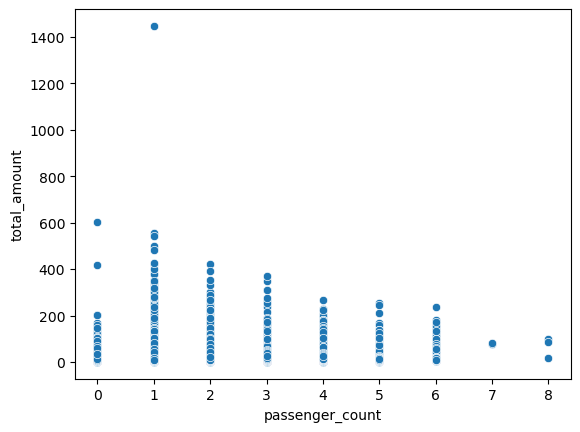

In [26]:
#  passenger count vs total amount
sns.scatterplot(data = df_latest, x = "passenger_count", y = "total_amount")

<AxesSubplot:xlabel='trip_distance', ylabel='total_amount'>

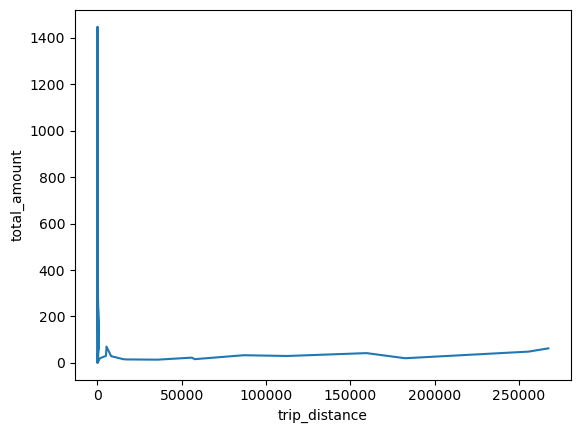

In [27]:
# total distance vs total amount
sns.lineplot(data = df_latest, x = "trip_distance", y = "total_amount")

# DATA VISUALIZATION

In [28]:
df_latest["passenger_count"].value_counts()

1.0    372847
2.0     76582
3.0     19896
0.0      9855
4.0      9284
5.0      8496
6.0      5584
8.0         3
7.0         2
Name: passenger_count, dtype: int64

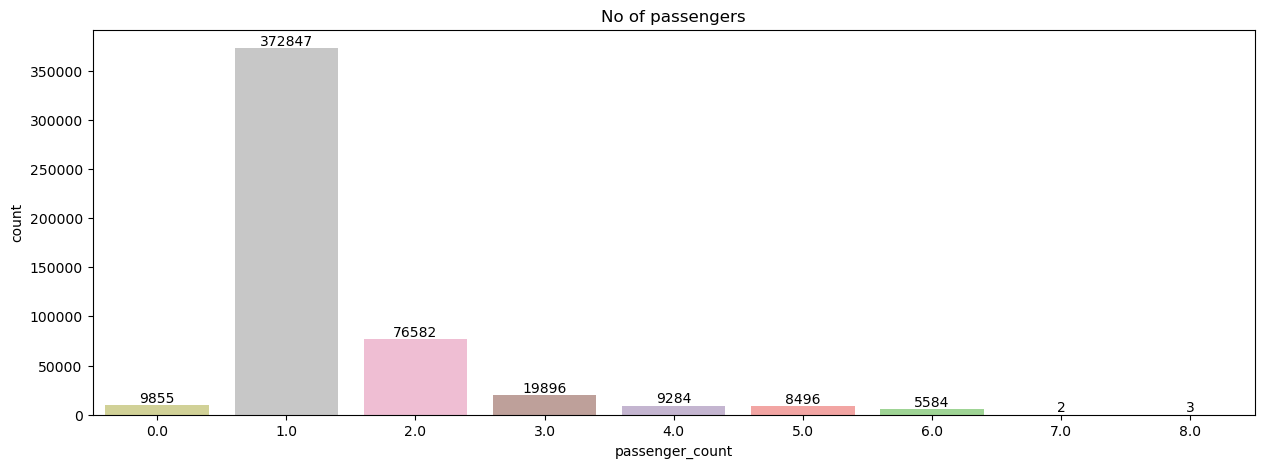

In [29]:
# No of passenger count
a = plt.figure(figsize=(15,5))
ax = sns.countplot(df_latest["passenger_count"], palette="tab20_r")
plt.title("No of passengers")
for containers in ax.containers:
    plt.bar_label(containers)

In [30]:
df_latest = df_latest.loc[~(df_latest["payment_type"]==0)]

In [31]:
df_latest = df_latest.loc[~(df_latest["payment_type"]==3)]

In [32]:
df_latest = df_latest.loc[~(df_latest["payment_type"]==4)]

In [33]:
df_latest.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'Payment type')

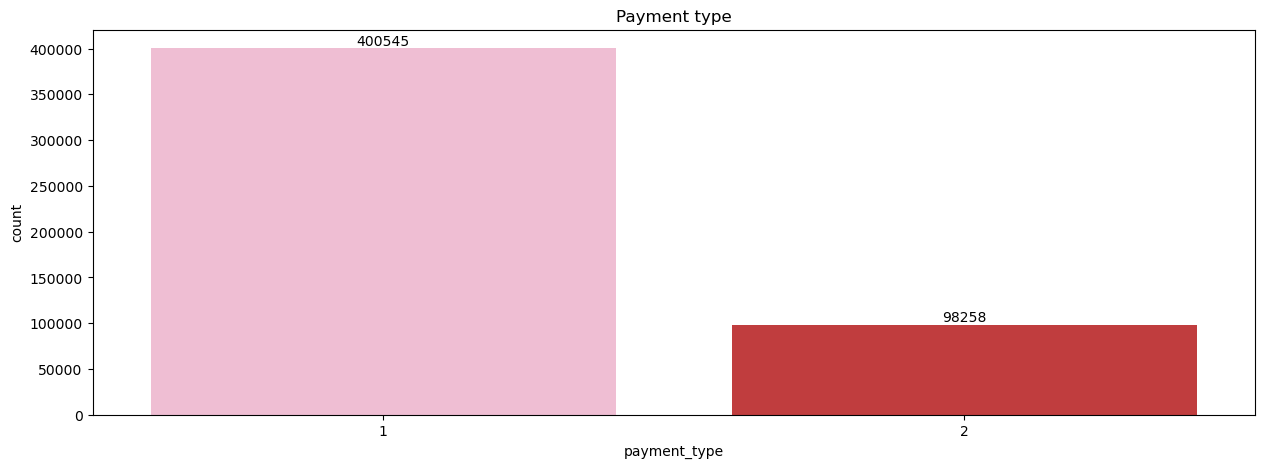

In [34]:
# No of payment Mode
a = plt.figure(figsize=(15,5))
ax = sns.countplot(df_latest["payment_type"], palette="tab20_r")
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Payment type")

# top 10 pick up location

In [35]:
top_10 = [i for i in df_latest["PULocationID"].value_counts().head(10).index]

In [36]:
df_top10pick = df_latest.loc[df_latest["PULocationID"].isin(top_10)]

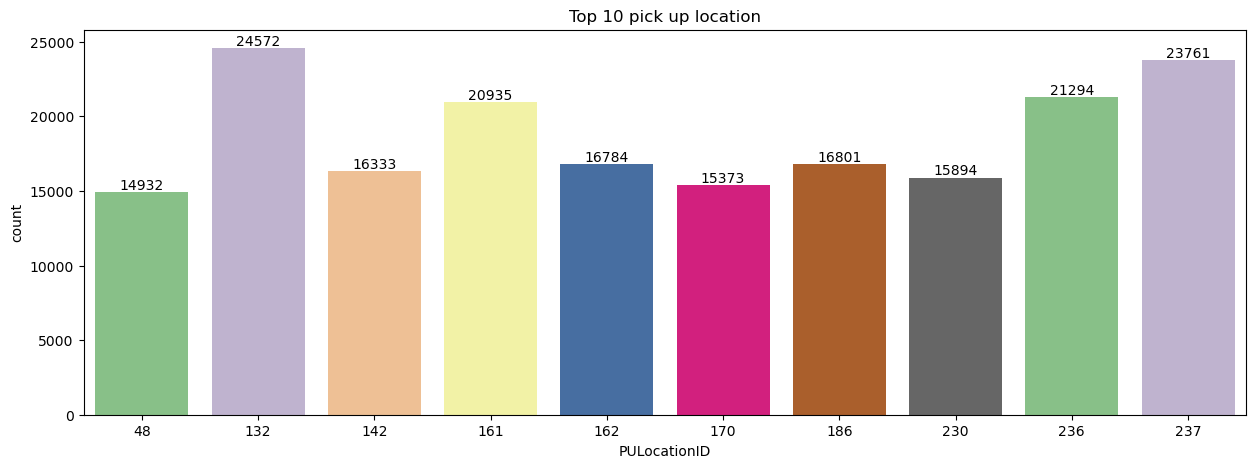

In [37]:
a = plt.figure(figsize=(15,5))
ax = sns.countplot(df_top10pick["PULocationID"], palette = "Accent")
plt.title("Top 10 pick up location")
for containers in ax.containers:
    ax.bar_label(containers)
plt.show()

# top 10 drop location

In [38]:
df_latest["DOLocationID"].nunique()

258

In [39]:
top_10drop = [i for i in df_latest["DOLocationID"].value_counts().head(10).index]

In [40]:
df_top10drop = df_latest.loc[df_latest["DOLocationID"].isin(top_10drop)]

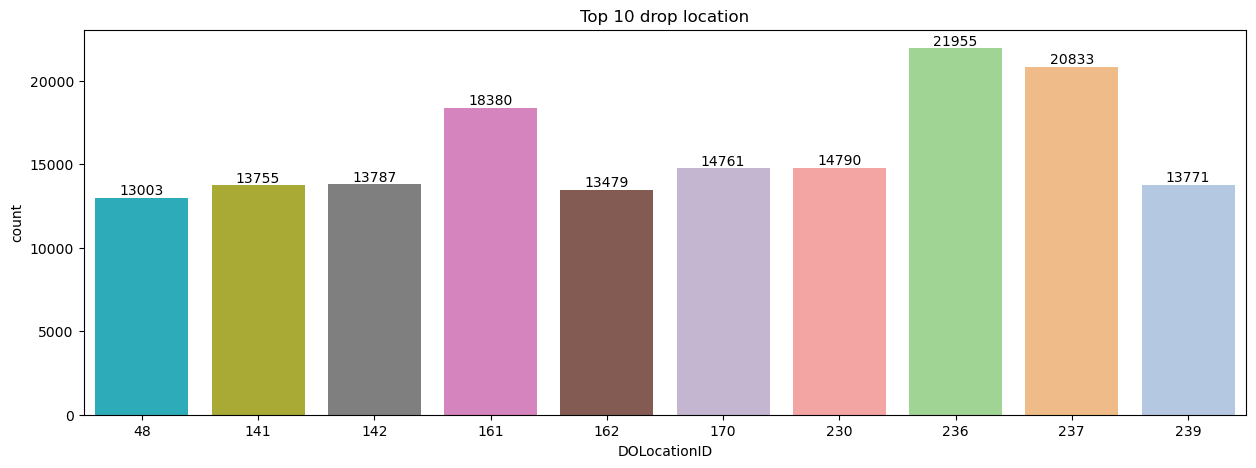

In [41]:
a = plt.figure(figsize=(15,5))
ax = sns.countplot(df_top10drop["DOLocationID"], palette="tab20_r")
plt.title("Top 10 drop location")
for containers in ax.containers:
    ax.bar_label(containers)
plt.show()

In [42]:
df_latest = df_latest.loc[~(df_latest["passenger_count"]==0)]
df_latest = df_latest.loc[~(df_latest["passenger_count"].isin([7., 8., 9.]))]

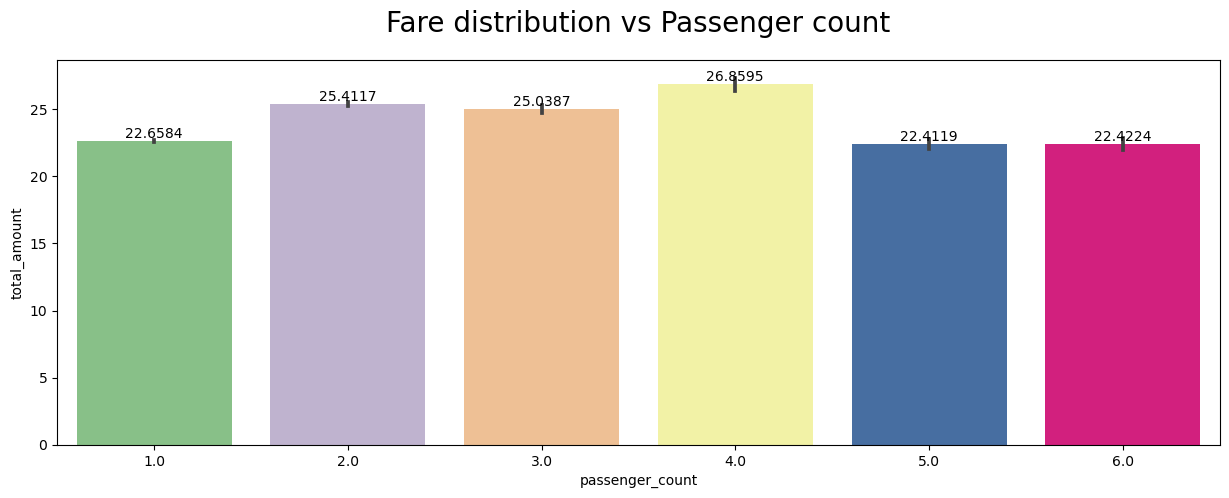

In [43]:
c = plt.figure(figsize=(15,5))
af = sns.barplot(y = df_latest["total_amount"], x = df_latest["passenger_count"], palette="Accent")
plt.title("Fare distribution vs Passenger count", size=20, pad=20)
for containers in af.containers:
    af.bar_label(containers)
plt.show()

# fare distribution as per top 10 pick up location

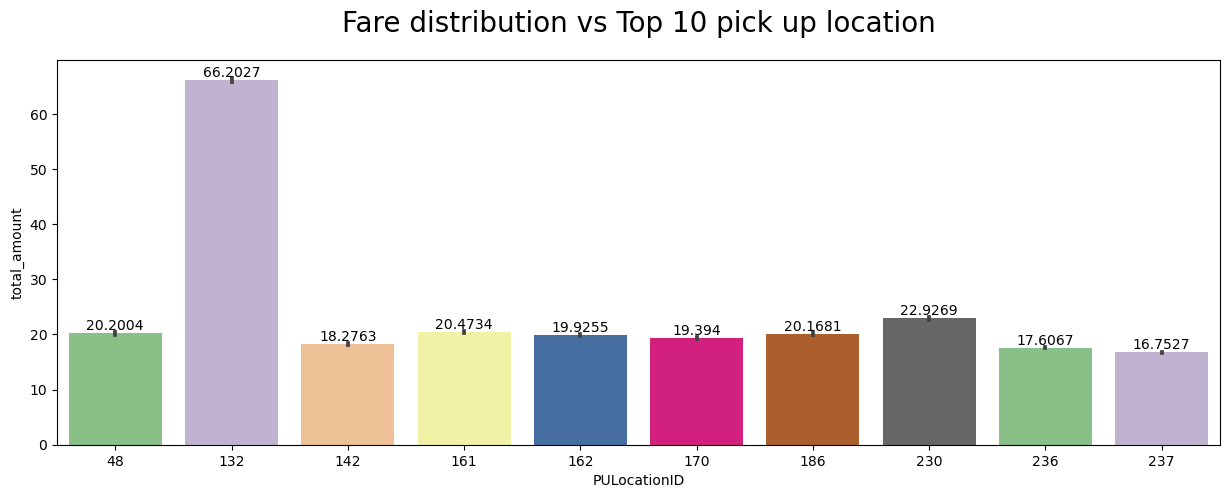

In [44]:
b = plt.figure(figsize=(15,5))
ax = sns.barplot(y=df_top10pick["total_amount"], x=df_top10pick["PULocationID"], palette="Accent")
plt.title("Fare distribution vs Top 10 pick up location", size=20, pad=20)
for containers in ax.containers:
    ax.bar_label(containers)
plt.show()

# fare distribution vs pick up month

In [45]:
data_fare = pd.DataFrame(df_latest.groupby("pick_month")["total_amount"].sum()).reset_index()

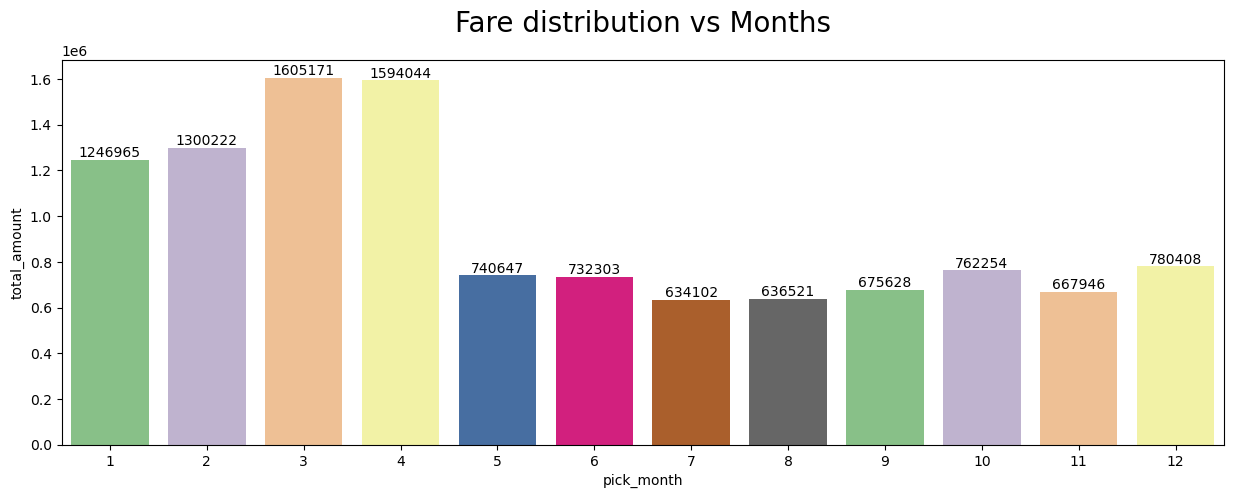

In [46]:
b = plt.figure(figsize=(15,5))
ax = sns.barplot(y=data_fare["total_amount"], x=data_fare["pick_month"], palette="Accent")
plt.title("Fare distribution vs Months", size=20, pad=20)
for containers in ax.containers:
    ax.bar_label(containers,fmt="%d")
plt.show()

# fare distribution vs pick up hour

In [47]:
data_fare = pd.DataFrame(df_latest.groupby("pick_hour")["total_amount"].sum()).reset_index()

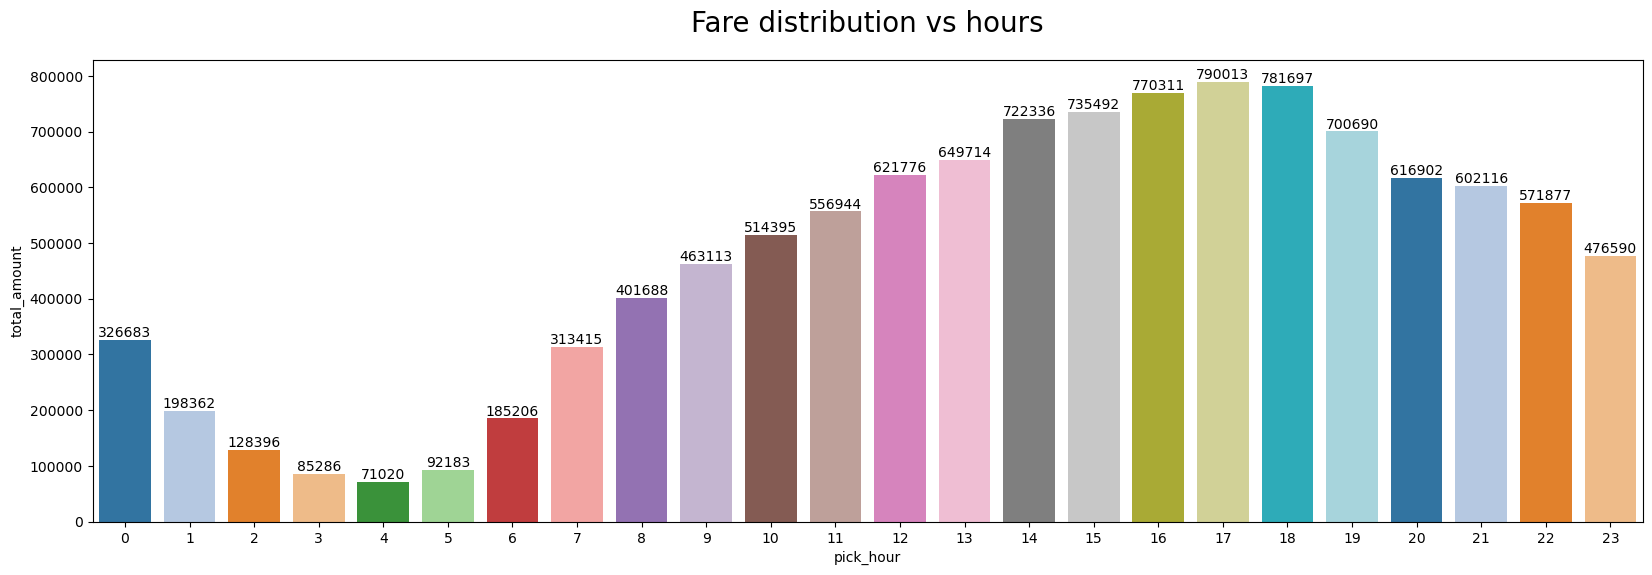

In [48]:
b = plt.figure(figsize=(20,6))
ax = sns.barplot(y=data_fare["total_amount"], x=data_fare["pick_hour"], palette="tab20")
plt.title("Fare distribution vs hours", size=20, pad=20)
for containers in ax.containers:
    ax.bar_label(containers,fmt="%d")
plt.show()

# fare distribution vs pick weekday

In [49]:
data_fare = pd.DataFrame(df_latest.groupby("pick_weekday")["total_amount"].sum()).reset_index()

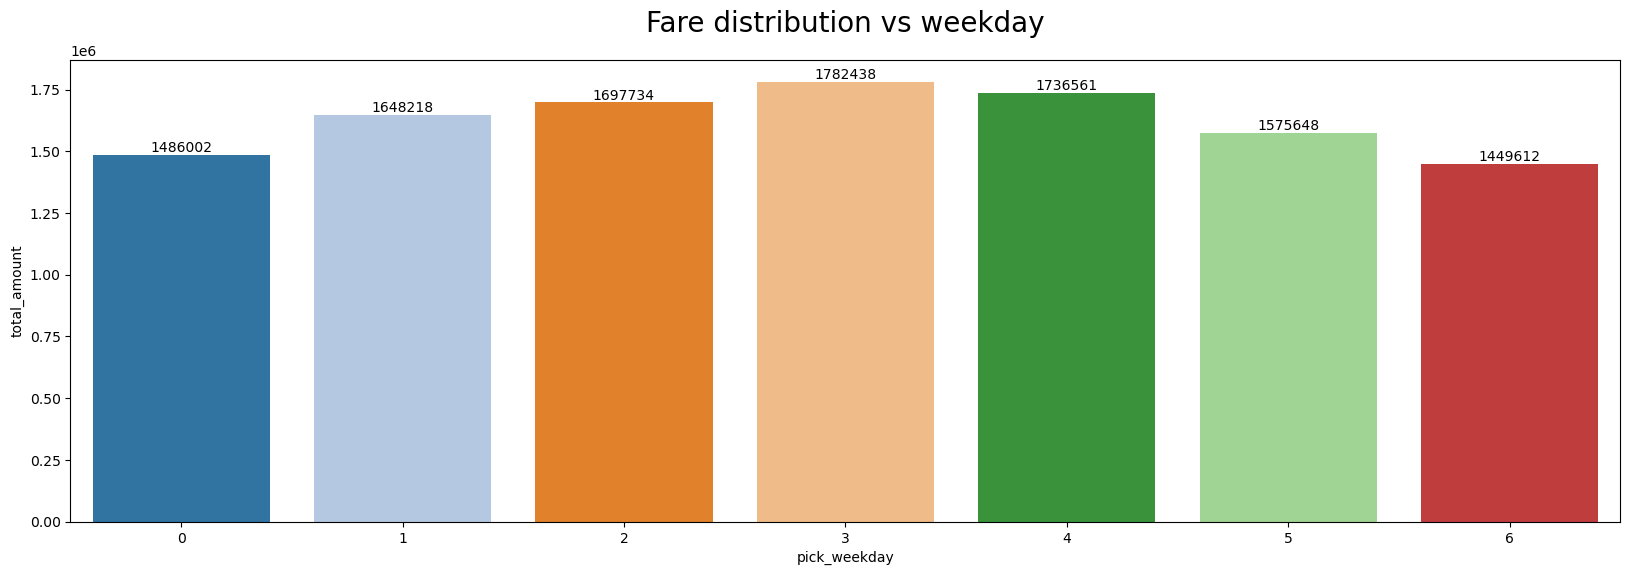

In [50]:
b = plt.figure(figsize=(20,6))
ax = sns.barplot(y=data_fare["total_amount"], x=data_fare["pick_weekday"], palette="tab20")
plt.title("Fare distribution vs weekday", size=20, pad=20)
for containers in ax.containers:
    ax.bar_label(containers,fmt="%d")
plt.show()

In [51]:
df_latest["total_time_hrs"] = df_latest["tot_mins_diff"]/60

In [52]:
df_latest["total_time_hrs"]

0         0.369722
1         0.565556
2         0.110833
3         0.229444
4         0.220556
            ...   
498798    0.250556
498799    0.085278
498800    0.388889
498801    0.206667
498802    0.023889
Name: total_time_hrs, Length: 489201, dtype: float64

In [53]:
df_latest["time_analysis"] = df_latest["total_time_hrs"].apply(lambda x: "more than 30 mins" if x>.5 else "less than 30 mins")

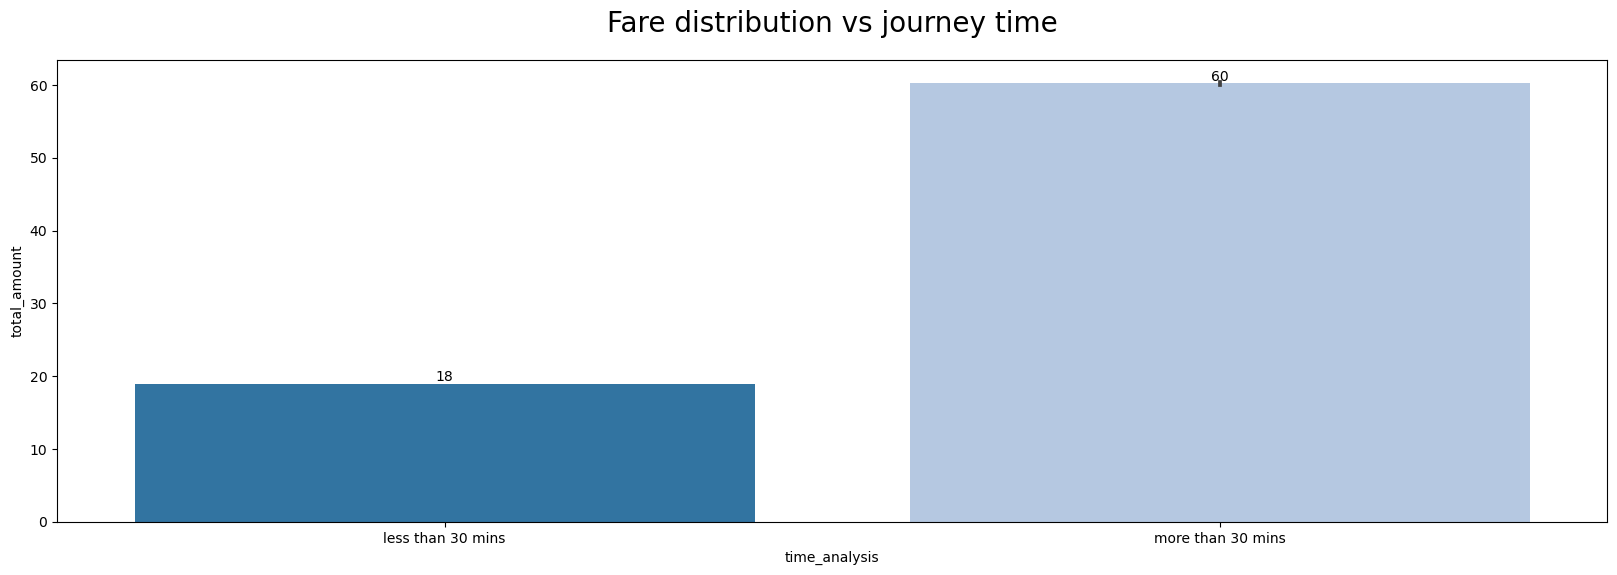

In [54]:
b = plt.figure(figsize=(20,6))
ax = sns.barplot(y=df_latest["total_amount"], x=df_latest["time_analysis"], palette="tab20")
plt.title("Fare distribution vs journey time", size=20, pad=20)
for containers in ax.containers:
    ax.bar_label(containers,fmt="%d")
plt.show()

# trip distance vs total amount

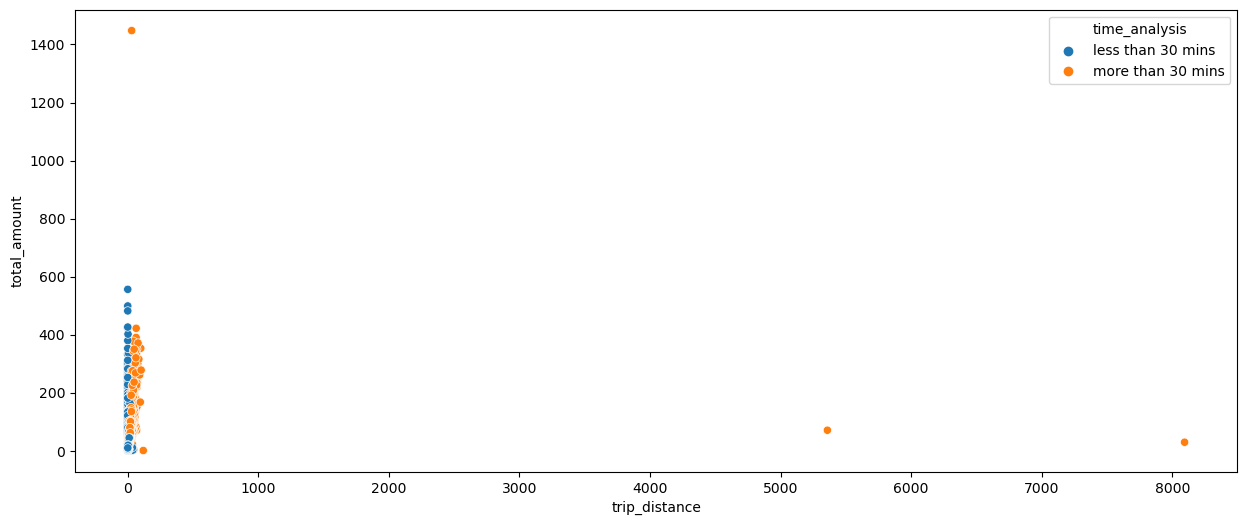

In [55]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df_latest["trip_distance"], y=df_latest["total_amount"], data=df_latest,hue="time_analysis")
plt.show()

In [56]:
df1 = df_latest.loc[df_latest["trip_distance"]<1000]

In [57]:
df_latest = df_latest.loc[df_latest["trip_distance"]<1000]

In [58]:
df_latest = df_latest.loc[~(df_latest["trip_distance"]==0)]

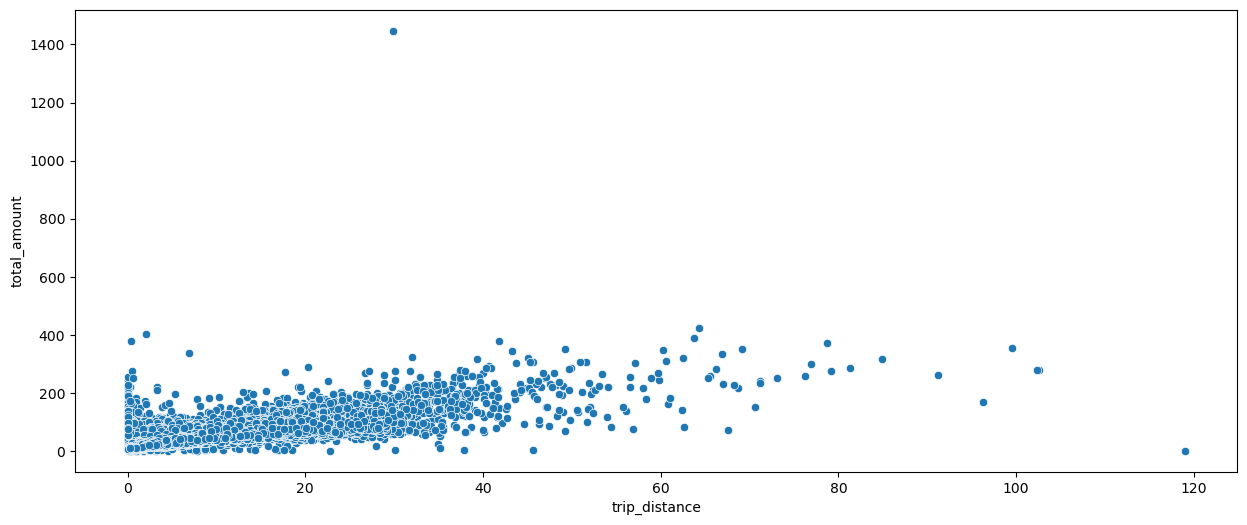

In [59]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="trip_distance", y="total_amount", data=df_latest)
plt.show()

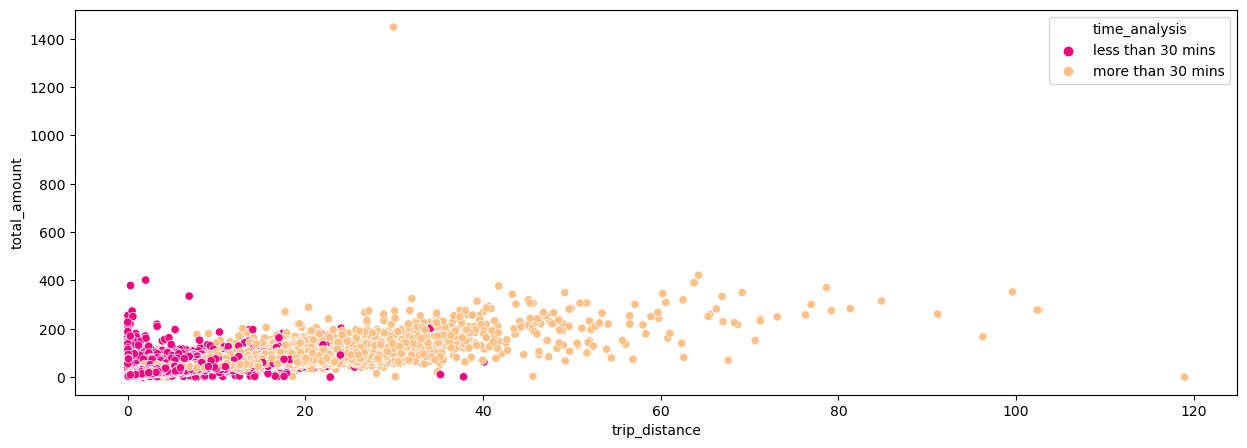

In [60]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="trip_distance", y="total_amount", data=df_latest, hue="time_analysis", palette="Accent_r")
plt.show()

# total distance travelled vs journey time

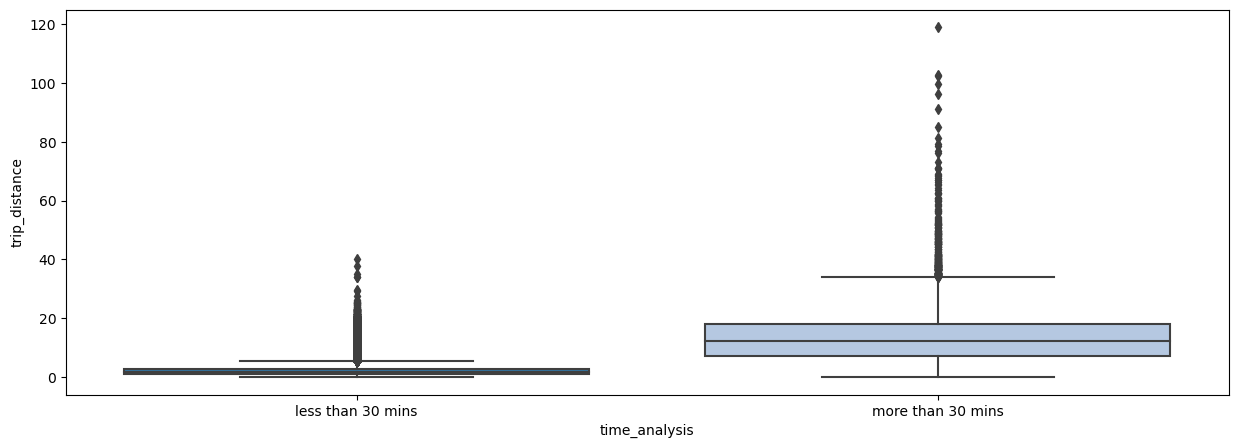

In [61]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_latest, y="trip_distance", x="time_analysis", palette="tab20")
plt.show()

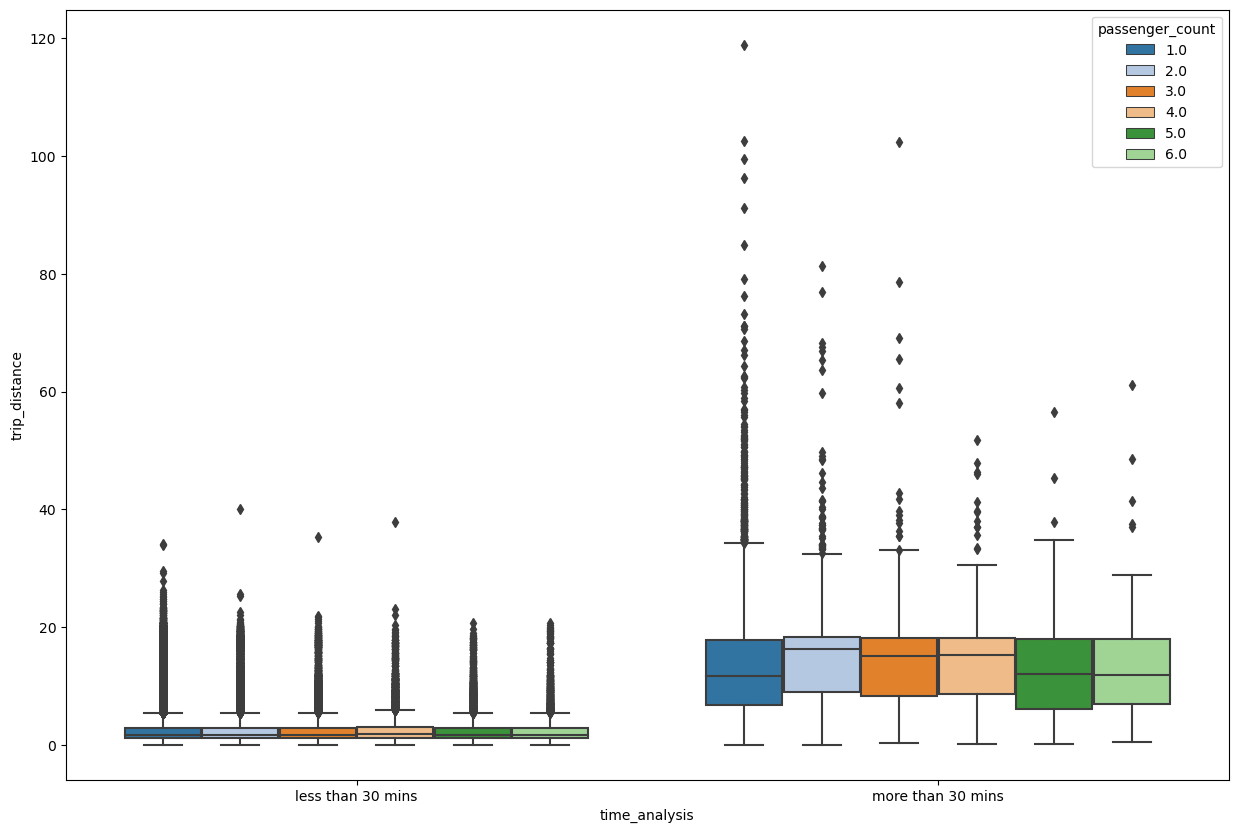

In [62]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_latest, y="trip_distance", x="time_analysis", hue='passenger_count', palette="tab20")
plt.show()

In [63]:
df_latest.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,pick_weekday_name,drop_weekday_name,tot_mins_diff,total_time_hrs,time_analysis
0,1.0,15.93,170,132,1,71.85,4,17,3,2022,3,5,17,3,2022,3,Thursday,Thursday,22.183333,0.369722,less than 30 mins
1,1.0,10.20,230,138,1,50.80,11,29,7,2022,4,12,29,7,2022,4,Friday,Friday,33.933333,0.565556,more than 30 mins
2,1.0,1.44,48,68,1,12.42,22,26,11,2022,5,22,26,11,2022,5,Saturday,Saturday,6.650000,0.110833,less than 30 mins
3,2.0,1.45,263,43,1,18.20,13,30,12,2022,4,13,30,12,2022,4,Friday,Friday,13.766667,0.229444,less than 30 mins
4,1.0,1.84,237,239,2,18.20,11,9,3,2023,3,12,9,3,2023,3,Thursday,Thursday,13.233333,0.220556,less than 30 mins


In [64]:
df_latest["payment_type"].value_counts()

1    389319
2     94579
Name: payment_type, dtype: int64

In [65]:
top2_payment = [i for i in df_latest["payment_type"].value_counts().head(2).index]

In [66]:
for i,j in zip(top2_payment, ['Cash', "Creditcard"]):
    df_latest[j+str(i)] = np.where(df_latest["payment_type"]==i,1,0)

In [67]:
df_latest.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,pick_weekday_name,drop_weekday_name,tot_mins_diff,total_time_hrs,time_analysis,Cash1,Creditcard2
0,1.0,15.93,170,132,1,71.85,4,17,3,2022,3,5,17,3,2022,3,Thursday,Thursday,22.183333,0.369722,less than 30 mins,1,0
1,1.0,10.20,230,138,1,50.80,11,29,7,2022,4,12,29,7,2022,4,Friday,Friday,33.933333,0.565556,more than 30 mins,1,0
2,1.0,1.44,48,68,1,12.42,22,26,11,2022,5,22,26,11,2022,5,Saturday,Saturday,6.650000,0.110833,less than 30 mins,1,0
3,2.0,1.45,263,43,1,18.20,13,30,12,2022,4,13,30,12,2022,4,Friday,Friday,13.766667,0.229444,less than 30 mins,1,0
4,1.0,1.84,237,239,2,18.20,11,9,3,2023,3,12,9,3,2023,3,Thursday,Thursday,13.233333,0.220556,less than 30 mins,0,1


In [68]:
df_latest["pick_hour"].value_counts()

18    34318
17    32613
19    31000
15    30280
16    30220
14    29753
13    27603
20    27124
12    27057
21    25958
11    24999
22    23967
10    23153
9     20973
23    19192
8     18201
7     13700
0     13249
1      8781
6      6978
2      5876
3      3743
5      2730
4      2430
Name: pick_hour, dtype: int64

In [69]:
df_latest.shape

(483898, 23)

In [70]:
df_latest["peak_hour"] = df_latest.groupby("pick_hour")["total_amount"].transform(lambda x : x.sum()/df_latest.shape[0])

In [71]:
df_latest.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,pick_weekday_name,drop_weekday_name,tot_mins_diff,total_time_hrs,time_analysis,Cash1,Creditcard2,peak_hour
0,1.0,15.93,170,132,1,71.85,4,17,3,2022,3,5,17,3,2022,3,Thursday,Thursday,22.183333,0.369722,less than 30 mins,1,0,0.138574
1,1.0,10.20,230,138,1,50.80,11,29,7,2022,4,12,29,7,2022,4,Friday,Friday,33.933333,0.565556,more than 30 mins,1,0,1.130275
2,1.0,1.44,48,68,1,12.42,22,26,11,2022,5,22,26,11,2022,5,Saturday,Saturday,6.650000,0.110833,less than 30 mins,1,0,1.162943
3,2.0,1.45,263,43,1,18.20,13,30,12,2022,4,13,30,12,2022,4,Friday,Friday,13.766667,0.229444,less than 30 mins,1,0,1.318195
4,1.0,1.84,237,239,2,18.20,11,9,3,2023,3,12,9,3,2023,3,Thursday,Thursday,13.233333,0.220556,less than 30 mins,0,1,1.130275


In [72]:
unwanted_features = ["PULocationID", "DOLocationID", "payment_type", "pick_hour", "pick_day", "pick_month", "pick_year", "pick_weekday", "drop_hour", "drop_day", "drop_month", "drop_year", "drop_weekday", "pick_weekday_name", "drop_weekday_name", "total_time_hrs", "time_analysis"]

In [73]:
df_latest = df_latest.drop(unwanted_features, axis=1)

In [74]:
df_latest.head()

,passenger_count,trip_distance,total_amount,tot_mins_diff,Cash1,Creditcard2,peak_hour
0,1.0,15.93,71.85,22.183333,1,0,0.138574
1,1.0,10.20,50.80,33.933333,1,0,1.130275
2,1.0,1.44,12.42,6.650000,1,0,1.162943
3,2.0,1.45,18.20,13.766667,1,0,1.318195
4,1.0,1.84,18.20,13.233333,0,1,1.130275


# Cheacking outliers

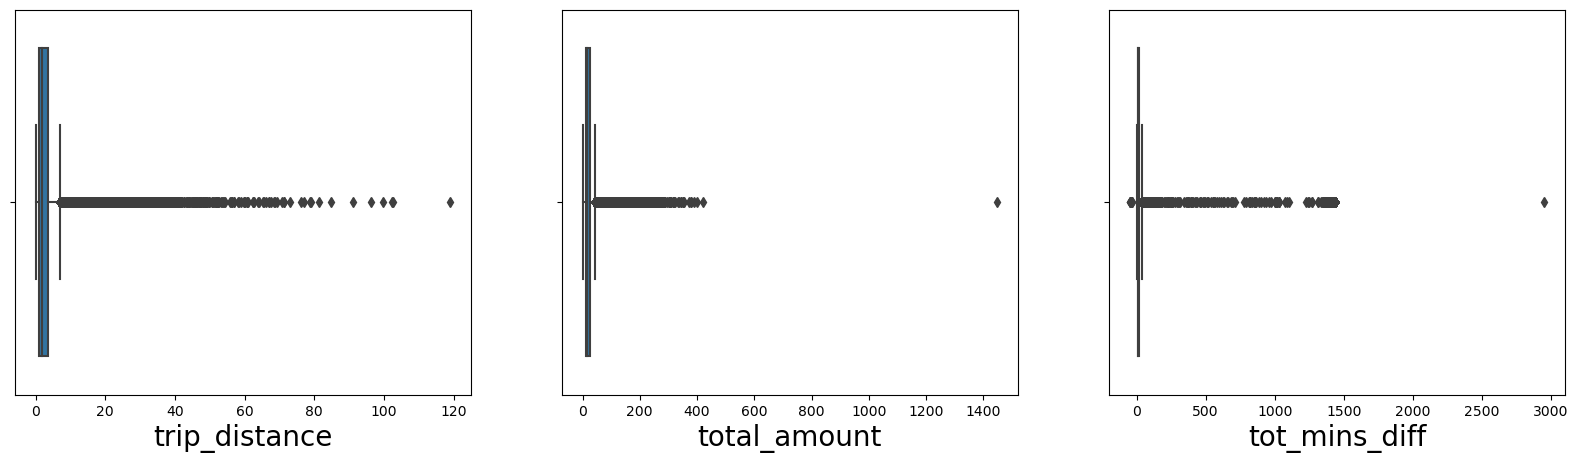

In [75]:
plt.figure(figsize=(20,5))
plotnumber = 1
for i in df_latest[["trip_distance", "total_amount", "tot_mins_diff"]]:
    ax=plt.subplot(1,3,plotnumber)
    sns.boxplot(df_latest[i])
    plt.xlabel(i, fontsize=20)
    plotnumber+=1
plt.show()

In [76]:
df_latest = df_latest.loc[~(df_latest["tot_mins_diff"]<3)]

In [77]:
df_latest.isnull().sum()

passenger_count    0
trip_distance      0
total_amount       0
tot_mins_diff      0
Cash1              0
Creditcard2        0
peak_hour          0
dtype: int64

In [78]:
df_latest = df_latest.loc[~((df_latest["tot_mins_diff"]>150) & (df_latest["trip_distance"]<15))]

In [79]:
df_latest = df_latest.loc[~(df_latest["tot_mins_diff"]>200)]

In [80]:
df_latest = df_latest.loc[~((df_latest["tot_mins_diff"]>100) & (df_latest["trip_distance"]<5))]

In [81]:
df_latest = df_latest.loc[~((df_latest["total_amount"]>200) & (df_latest["trip_distance"]<35))]

In [82]:
df_latest = df_latest.loc[~((df_latest["total_amount"]>300) & (df_latest["trip_distance"]<=50))]

In [83]:
df_latest.head()

,passenger_count,trip_distance,total_amount,tot_mins_diff,Cash1,Creditcard2,peak_hour
0,1.0,15.93,71.85,22.183333,1,0,0.138574
1,1.0,10.20,50.80,33.933333,1,0,1.130275
2,1.0,1.44,12.42,6.650000,1,0,1.162943
3,2.0,1.45,18.20,13.766667,1,0,1.318195
4,1.0,1.84,18.20,13.233333,0,1,1.130275


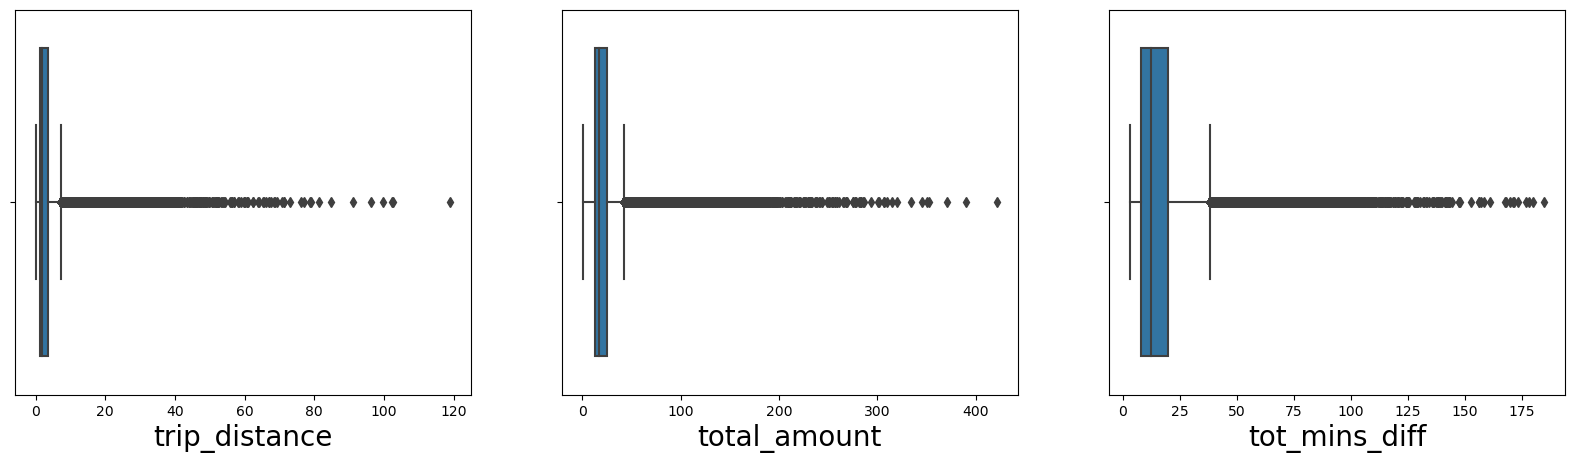

In [84]:
plt.figure(figsize=(20,5))
plotnumber = 1
for i in df_latest[["trip_distance", "total_amount", "tot_mins_diff"]]:
        ax=plt.subplot(1,3,plotnumber)
        sns.boxplot(df_latest[i])
        plt.xlabel(i, fontsize=20)
        plotnumber+=1
plt.show()

# Model building

In [85]:
x = df_latest.drop(["total_amount"],axis=1)

In [86]:
y = df_latest["total_amount"]

In [87]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [88]:
model = {
    'linear_regression' : {'model': LinearRegression(), 'params': {'positive': [True,False]}},
    'random_forest' : {'model': RandomForestRegressor(), 'params': {'n_estimators': [50,100,200,300], 'max_samples': [.6,.7]}},
    'decision_tree' : {'model': DecisionTreeRegressor(), 'params': {'max_depth': [3,5,10,15,20,25,30,35,40,45,50], 'splitter': ["best","random"]}}
}

In [89]:
def find_best_model_using_gridsearchcv(x,y):
    
    scores = []
    
    cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
    for model_name, config in model.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [90]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.879160,{'positive': False}
1,random_forest,0.887185,"{'max_samples': 0.6, 'n_estimators': 200}"
2,decision_tree,0.885944,"{'max_depth': 10, 'splitter': 'best'}"


In [91]:
rf = RandomForestRegressor(max_samples=.7, n_estimators=100)

In [92]:
modell = rf.fit(x,y)

In [124]:
data_given = []
for i in range(1):
    passenger_count = int(input("Enter ur passengers"))
    trip_distance = int(input("Enter distance"))
    time_taken = int(input("Enter time taken"))
    payment_mode1 = int(input("Enter ur payment"))
    payment_mode2 = int(input("Enter ur payment"))
    pick_hour = float(input("Enter ur pick hour"))
    data_given.append([passenger_count, trip_distance, pick_hour, time_taken, payment_mode1, payment_mode2])

Enter ur passengers1
Enter distance35
Enter time taken90
Enter ur payment1
Enter ur payment0
Enter ur pick hour.8


In [125]:
data_given

[[1, 35, 0.8, 90, 1, 0]]

In [126]:
print("Predicted fare of ride {} $".format(round(modell.predict(data_given)[0]),2))

Predicted fare of ride 71 $
